## prepare environment

In [ ]:
# load libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import cohen_kappa_score

# preprocessing dataset1 (wines.csv)

In [ ]:
# load filtered dataset
wines = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CAB/wine/data/wines_prep.csv", sep=",", index_col=[0])

# =======preprocessing : categorical DV (string to numeric) 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
wines['wine_type_N'] = labelencoder.fit_transform(wines['wine_type']) #red: 0, white: 1
wines['wine_quality_N'] = labelencoder.fit_transform(wines['quality_label']) #high:0, low:1, medium:2

wines.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label,wine_type_N,wine_quality_N
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high,1,0
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low,0,1
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium,1,2
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium,1,2
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium,1,2
5,7.2,0.53,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1,6,red,medium,0,2
6,7.5,0.27,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5,white,low,1,1
7,6.8,0.11,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,6,white,medium,1,2
8,9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.2,5,red,low,0,1
9,7.1,0.23,0.30,2.6,0.034,62.0,148.0,0.99121,3.03,0.56,11.3,7,white,medium,1,2


In [ ]:
print(wines.dtypes)
print(wines.info)
print(wines.columns)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
quality_label            object
wine_type_N               int64
wine_quality_N            int64
dtype: object
<bound method DataFrame.info of       fixed acidity  volatile acidity  ...  wine_type_N  wine_quality_N
0               7.0              0.17  ...            1               0
1               7.7              0.64  ...            0               1
2               6.8              0.39  ...            1               2
3               6.3              0.28  ...            1               2
4               7.4              0.35  ...            1               2
...       

In [ ]:
# =======preprocessing : prepare dataset for classification
w_features = wines.iloc[:,1:-5]
w_feature_names = w_features.columns

# set IV and DV
X = w_features
y = wines['quality_label']
#y = w_features['wine_type']

# split dataset for predicting wine quality
wq_train_X, wq_test_X, wq_train_y, wq_test_y = train_test_split(X, y, test_size=0.3, random_state=42)
print(Counter(wq_train_y), Counter(wq_test_y))
print('Features:', list(w_feature_names))

Counter({'medium': 2737, 'low': 1666, 'high': 144}) Counter({'medium': 1178, 'low': 718, 'high': 54})
Features: ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH']


In [ ]:
# standardization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#scaler = MinMaxScaler()
sc = StandardScaler()
X = np.array(X)

sc.fit_transform(wq_train_X)
sc.transform(wq_test_X)

array([[-0.36677232,  0.21304342, -0.73973914, ...,  0.07870662,
        -0.45800976, -0.35881245],
       [-0.4893465 ,  1.175018  ,  0.57239971, ...,  1.43775199,
         0.29895414, -0.171597  ],
       [-0.79578197,  0.35046836, -0.61275796, ...,  0.39640554,
        -0.98921249,  0.70207508],
       ...,
       [-0.61192069, -0.33665635,  2.41362682, ...,  0.23755608,
         0.74051642,  0.07802359],
       [-0.30548522, -0.19923141, -0.16832384, ...,  0.69645452,
        -0.5244101 , -0.92045878],
       [-0.36677232, -0.26794388, -0.50694031, ..., -0.30959206,
        -0.83649171,  0.20283389]])

# preprocessing dataset2 (wines_sales_prep.csv)

In [ ]:
# load filtered dataset
df = pd.read_csv("/content/sample_data/ML/wines_sales_prep.csv", sep=",")

# re-shuffle records just to randomize data points
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df.head(10)

In [ ]:
# set IV and DV for modelling
df_feature = df.loc[:,('points')] #,'rating_n'
df_feature_names = 'points'
df_price = np.array(df['price_bin_n'])

X = df_feature
y = df_price

# =======split dataset 
wpr_train_X, wpr_test_X, wpr_train_y, wpr_test_y = train_test_split(X,y, test_size=0.3, random_state=42)
print(Counter(wpr_train_y), Counter(wpr_test_y))
# Counter({2: 130, 1: 53, 0: 37}) Counter({2: 65, 1: 17, 0: 13}) #high:0, low:1, middle:2 
print('IV:', df_feature_names, '/ DV: high:0, low:1, middle:2' )

Counter({2: 130, 1: 53, 0: 37}) Counter({2: 65, 1: 17, 0: 13})
IV: points / DV: high:0, low:1, middle:2


# Visualization

In [ ]:
# distribution of quality_label ("rating") and price tag ("price_bin") using boxplot / histplot

# Modelling - comparison algorithms for wine_quality

In [ ]:
# wq_train_X, wq_test_X, wq_train_y, wq_test_y

# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# load dataset
# set IV and DV
X = w_features
Y = wines['quality_label']

# prepare configuration for cross validation test harness
seed = 10
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 20)))
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('SVM', SVC()))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.637373 (0.036479)
KNN: 0.614597 (0.014859)
RF: 0.808220 (0.014169)
CART: 0.733106 (0.012939)


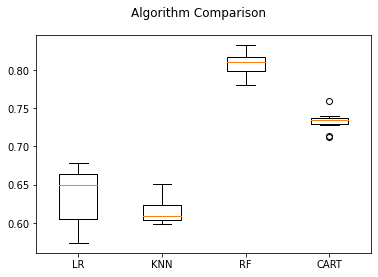

In [ ]:
# evaluate each model in turn - wine_quality
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
 
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# output
# LR: 0.619521 (0.022164)
# KNN: 0.587043 (0.018804)
# RF: 0.814684 (0.011133)
# CART: 0.729568 (0.019463)
# SVM: 0.602586 (0.022230)

In [ ]:
# save plot
from google.colab import files
plt.savefig("compr_wq_models.png")
files.download("compr_wq_models.png") 

# modelling - comparison algorithms for red wine

In [ ]:
#load dataset
wines = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wines_prep.csv", sep=",", index_col=[0])

wines_red = wines[wines['wine_type'] == 'red'] #1599 rows
wines_red.describe()

In [ ]:
# =======preprocessing : categorical DV (string to numeric) 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
wines_red['wine_quality_N'] = labelencoder.fit_transform(wines_red['quality_label']) #high:0, low:1, medium:2

wines_red.head(10)

# =======preprocessing : prepare dataset for classification
rw_features = wines_red.iloc[:,:-4]
rw_features_names = rw_features.columns

# set IV and DV
X = rw_features
y = wines_red['quality_label']
#y = rw_features['wine_type']

# split dataset for predicting wine quality
r_wq_train_X, r_wq_test_X, r_wq_train_y, r_wq_test_y = train_test_split(X, y, test_size=0.3, random_state=42)
print(Counter(r_wq_train_y), Counter(r_wq_test_y))
#Counter({'medium': 590, 'low': 514, 'high': 15}) Counter({'medium': 247, 'low': 230, 'high': 3})
print('Features:', list(rw_features_names))

# standardization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#scaler = MinMaxScaler()
sc = StandardScaler()
X = np.array(X)

sc.fit_transform(r_wq_train_X)
sc.transform(r_wq_test_X)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.729222 (0.041742)
KNN: 0.656057 (0.042774)
RF: 0.824914 (0.032737)
CART: 0.751733 (0.024405)


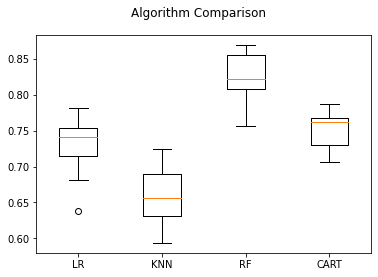

In [ ]:
# ================= comparison algorithms for predicting red wine quality
# r_wq_train_X, r_wq_test_X, r_wq_train_y, r_wq_test_y

# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# load dataset
# set IV and DV
X = rw_features
Y = wines_red['quality_label']

# prepare configuration for cross validation test harness
seed = 10
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 20)))
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('SVM', SVC()))

# evaluate each model in turn - wine_quality
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
 
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# output
# LR: 0.632327 (0.038602)
# KNN: 0.527237 (0.035207)
# RF: 0.815527 (0.031444)
# CART: 0.733589 (0.038610)
# SVM: 0.523494 (0.042232)

# modelling - comparison algorithms for white wine

In [ ]:
#load dataset
wines = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wines_prep.csv", sep=",", index_col=[0])

wines_white = wines[wines['wine_type'] == 'white'] #4898 rows
wines_white.describe()

In [ ]:
labelencoder = LabelEncoder()
wines_white['wine_quality_N'] = labelencoder.fit_transform(wines_white['quality_label']) #high:0, low:1, medium:2

wines_white.head(10)
wines_white.to_csv("/content/drive/MyDrive/Colab Notebooks/data/wines_white.csv", sep=",")

In [ ]:
# =======preprocessing : prepare dataset for classification
ww_features = wines_white.iloc[:,:-4]
ww_features_names = ww_features.columns

# set IV and DV
X = ww_features
y = wines_white['quality_label']
#y = ww_features['wine_type']

# split dataset for predicting wine quality
w_wq_train_X, w_wq_test_X, w_wq_train_y, w_wq_test_y = train_test_split(X, y, test_size=0.3, random_state=42)
print(Counter(w_wq_train_y), Counter(w_wq_test_y))
#Counter({'medium': 590, 'low': 514, 'high': 15}) Counter({'medium': 247, 'low': 230, 'high': 3})
print('Features:', list(ww_features_names))

# standardization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#scaler = MinMaxScaler()
sc = StandardScaler()
X = np.array(X)

sc.fit_transform(w_wq_train_X)
sc.transform(w_wq_test_X)

Counter({'medium': 2179, 'low': 1131, 'high': 118}) Counter({'medium': 899, 'low': 509, 'high': 62})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([[ 0.04683976, -0.87076134,  0.10971019, ...,  1.13309901,
        -0.09081478, -0.57369032],
       [-1.24710427,  0.241204  , -2.05505614, ..., -0.24644252,
        -0.09081478, -0.65532199],
       [ 0.39973358,  4.13308272, -1.05593322, ..., -1.23182932,
         0.51317396, -1.14511203],
       ...,
       [-1.129473  ,  1.65643263, -0.0568103 , ...,  1.79002355,
        -0.43595119,  0.81404813],
       [-0.30605407, -0.87076134, -0.47311152, ...,  0.21340466,
         1.72115142,  0.56915311],
       [-1.129473  , -0.46641031, -0.30659103, ...,  0.60755938,
        -0.86737171, -0.90021701]])

In [ ]:
# ================= comparison algorithms for predicting red wine quality
# r_wq_train_X, r_wq_test_X, r_wq_train_y, r_wq_test_y

# load dataset
# set IV and DV
X = ww_features
Y = wines_white['quality_label']

# prepare configuration for cross validation test harness
seed = 10
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 20)))
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('SVM', SVC()))

# evaluate each model in turn - wine_quality
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
 
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# output
# LR: 0.664157 (0.019448)
# KNN: 0.653540 (0.018875)
# RF: 0.817889 (0.015139)
# CART: 0.755001 (0.013624)

# Modelling : predicting red wine quality from features, using RF/LR/KNN/SVM



## logistic regression

In [ ]:
# r_wq_train_X, r_wq_test_X, r_wq_train_y, r_wq_test_y

# define parameters of the logisitic regression model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False)

# =======train a model : fit the Logistic Regression classifier
wq_lr = LogisticRegression()
wq_lr.fit(r_wq_train_X, r_wq_train_y)
wq_lr.score(r_wq_test_X, r_wq_test_y)

# =======predict the wine type and evaluate the performance
r_wq_lr_predictions = wq_lr.predict(r_wq_test_X)
print(classification_report(r_wq_test_y,r_wq_lr_predictions))

#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#confusion_matrix(y_test, ypred)
#classification_report(y_test, ypred)

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         3
         low       0.75      0.71      0.73       230
      medium       0.74      0.78      0.76       247

    accuracy                           0.74       480
   macro avg       0.50      0.50      0.50       480
weighted avg       0.74      0.74      0.74       480



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy score:' + str(accuracy_score(r_wq_test_y,r_wq_lr_predictions))) #0.6375
print ('kappa score:' + str(cohen_kappa_score(r_wq_test_y, r_wq_lr_predictions))) #0.2703


accuracy score:0.74375
kappa score:0.4890346701746491


## random forest

In [ ]:
# r_wq_train_X, r_wq_test_X, r_wq_train_y, r_wq_test_y

from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(r_wq_train_X, r_wq_train_y)
r_wq_rf_predictions = random_forest_model.predict(r_wq_test_X)

#Measure the performance of the random forest model

print(classification_report(r_wq_test_y, r_wq_rf_predictions))
print(confusion_matrix(r_wq_test_y, r_wq_rf_predictions))


              precision    recall  f1-score   support

        high       0.00      0.00      0.00         3
         low       0.81      0.85      0.83       230
      medium       0.84      0.81      0.83       247

    accuracy                           0.83       480
   macro avg       0.55      0.56      0.55       480
weighted avg       0.82      0.83      0.82       480

[[  0   0   3]
 [  0 196  34]
 [  0  46 201]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy score:' + str(accuracy_score(r_wq_test_y,r_wq_rf_predictions))) #0.8291
print ('kappa score:' + str(cohen_kappa_score(r_wq_test_y, r_wq_rf_predictions))) #0.6603


accuracy score:0.8270833333333333
kappa score:0.6564154751021957


In [ ]:
# red wine - random forest - feature importance
r_feature_imp = pd.Series(random_forest_model.feature_importances_,index=rw_features_names).sort_values(ascending=False)
r_feature_imp

alcohol                 0.170815
sulphates               0.116420
volatile acidity        0.114962
total sulfur dioxide    0.093412
density                 0.090711
chlorides               0.079928
pH                      0.070331
citric acid             0.069720
fixed acidity           0.065833
free sulfur dioxide     0.064918
residual sugar          0.062950
dtype: float64

No handles with labels found to put in legend.


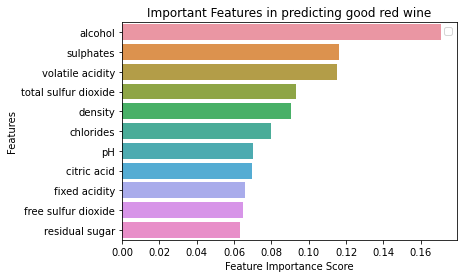

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Creating a bar plot
sns.barplot(x=r_feature_imp, y=r_feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features in predicting good red wine")
plt.legend()
plt.show()

### white wine

In [ ]:
# w_wq_train_X, w_wq_test_X, w_wq_train_y, w_wq_test_y

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(w_wq_train_X, w_wq_train_y)
w_wq_rf_predictions = rf.predict(w_wq_test_X)

#Measure the performance of the random forest model

print(classification_report(w_wq_test_y, w_wq_rf_predictions))
print(confusion_matrix(w_wq_test_y, w_wq_rf_predictions))


              precision    recall  f1-score   support

        high       1.00      0.32      0.49        62
         low       0.78      0.70      0.74       509
      medium       0.81      0.89      0.84       899

    accuracy                           0.80      1470
   macro avg       0.86      0.64      0.69      1470
weighted avg       0.80      0.80      0.79      1470

[[ 20   1  41]
 [  0 357 152]
 [  0 102 797]]


In [ ]:
print('accuracy score:' + str(accuracy_score(w_wq_test_y,w_wq_rf_predictions))) #0.8291
print ('kappa score:' + str(cohen_kappa_score(w_wq_test_y, w_wq_rf_predictions))) #0.6603


accuracy score:0.7986394557823129
kappa score:0.5798012573514499


In [ ]:
# white wine - random forest - feature importance
w_feature_imp = pd.Series(rf.feature_importances_,index=rw_features_names).sort_values(ascending=False)
w_feature_imp

alcohol                 0.130583
volatile acidity        0.120531
density                 0.105948
free sulfur dioxide     0.097533
total sulfur dioxide    0.087928
residual sugar          0.081390
chlorides               0.079802
pH                      0.079712
citric acid             0.078125
fixed acidity           0.069681
sulphates               0.068767
dtype: float64

In [ ]:
w_feature_df = pd.DataFrame(w_feature_imp, columns = ["feature_importance"])
w_feature_df_top5 = list(w_feature_df.head(5).index)
w_feature_df["top5"] = w_feature_df["feature_importance"].index.isin(w_feature_df_top5)
w_feature_df.head(10)

,feature_importance,top5
alcohol,0.130583,True
volatile acidity,0.120531,True
density,0.105948,True
free sulfur dioxide,0.097533,True
total sulfur dioxide,0.087928,True
residual sugar,0.081390,False
chlorides,0.079802,False
pH,0.079712,False
citric acid,0.078125,False
fixed acidity,0.069681,False


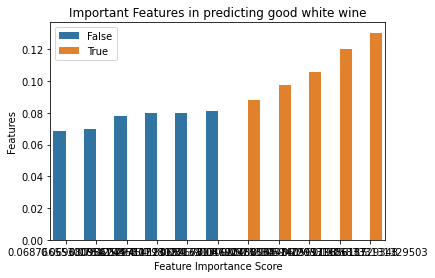

In [ ]:
# Creating a bar plot

sns.barplot(x=w_feature_df['feature_importance'][:], y=w_feature_df['feature_importance'], hue="top5", data = w_feature_df)
# Add labels to your graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features in predicting good white wine")
plt.legend()
plt.show()


## random forest with selected festures: alcohol, sulphates, volatile acidity - red wine

In [ ]:
# calculate class weight
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
# set IV and DV
X = rw_features[['alcohol','sulphates', 'volatile acidity','total sulfur dioxide','density']]
Y = wines_red['quality_label']
r3_feature_names = list(X.columns)

In [ ]:

# split dataset for predicting wine quality
r3_wq_train_X, r3_wq_test_X, r3_wq_train_y, r3_wq_test_y = train_test_split(X, Y, test_size=0.3, random_state=42)
print(Counter(r3_wq_train_y), Counter(r3_wq_test_y))
#Counter({'medium': 590, 'low': 514, 'high': 15}) Counter({'medium': 247, 'low': 230, 'high': 3})
print('Features:', list(r3_feature_names))

# standardization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#scaler = MinMaxScaler()
sc = StandardScaler()
X = np.array(X)

sc.fit_transform(r3_wq_train_X)
sc.transform(r3_wq_test_X)

Counter({'medium': 590, 'low': 514, 'high': 15}) Counter({'medium': 247, 'low': 230, 'high': 3})
Features: ['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide', 'density']


array([[-0.94935675, -1.17002756,  0.40310026,  0.38741287, -0.16715378],
       [-1.13406967, -1.41024788,  1.56965851,  1.18691565, -0.02190828],
       [-0.02579213, -0.3893115 ,  0.23644908, -0.59659055, -0.41614607],
       ...,
       [-0.48757444,  1.23217571, -0.48570603,  0.0491617 ,  0.82881538],
       [-0.85700029, -0.32925641,  0.01424751,  3.00117196, -0.08934369],
       [ 0.25127725, -0.6895869 ,  3.65279825, -0.99634194, -0.063407  ]])

In [ ]:
# r_wq_train_X, r_wq_test_X, r_wq_train_y, r_wq_test_y

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(r3_wq_train_X, r3_wq_train_y)
r3_wq_rf_predictions = rf.predict(r3_wq_test_X)

#Measure the performance of the random forest model

print(classification_report(r3_wq_test_y, r3_wq_rf_predictions))
print(confusion_matrix(r3_wq_test_y, r3_wq_rf_predictions))


              precision    recall  f1-score   support

        high       0.00      0.00      0.00         3
         low       0.83      0.81      0.82       230
      medium       0.82      0.84      0.83       247

    accuracy                           0.82       480
   macro avg       0.55      0.55      0.55       480
weighted avg       0.82      0.82      0.82       480

[[  0   0   3]
 [  0 187  43]
 [  2  37 208]]


In [ ]:
print('accuracy score:' + str(accuracy_score(r3_wq_test_y,r3_wq_rf_predictions))) #0.8229
print ('kappa score:' + str(cohen_kappa_score(r3_wq_test_y, r3_wq_rf_predictions))) #0.6486

accuracy score:0.8229166666666666
kappa score:0.6486877454019425


## KNN

In [ ]:
# r_wq_train_X, r_wq_test_X, r_wq_train_y, r_wq_test_y

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2) #p = 2 : euclidean_distance
knn.fit(r_wq_train_X, r_wq_train_y)
r_wq_knn_predictions = knn.predict(r_wq_test_X)

print(classification_report(r_wq_test_y, r_wq_knn_predictions))
print(confusion_matrix(r_wq_test_y, r_wq_knn_predictions))


              precision    recall  f1-score   support

        high       0.00      0.00      0.00         3
         low       0.52      0.57      0.54       230
      medium       0.56      0.53      0.54       247

    accuracy                           0.54       480
   macro avg       0.36      0.36      0.36       480
weighted avg       0.54      0.54      0.54       480

[[  0   1   2]
 [  0 130 100]
 [  0 117 130]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy score:' + str(accuracy_score(r_wq_test_y,r_wq_knn_predictions))) #0.5416
print ('kappa score:' + str(cohen_kappa_score(r_wq_test_y, r_wq_knn_predictions))) #0.0900

accuracy score:0.5416666666666666
kappa score:0.09009443716826371


In [ ]:
# find the optimal number of K

# another version of k-nearest neighbors model: choosing an optimal K-value using elbow method
error_rates = []

for i in np.arange(1, 15): #first tried with 101 and found lowest point around 10-15
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(r_wq_train_X, r_wq_train_y)
    new_predictions = new_model.predict(r_wq_test_X)
    error_rates.append(np.mean(new_predictions != r_wq_test_y))

plt.plot(error_rates)
#- error rates tend to be minimized with a K value of approximately 8. 
# This means that 8 is a suitable choice for K that balances both simplicity and predictive power.

## Decision Tree

In [ ]:
# r_wq_train_X, r_wq_test_X, r_wq_train_y, r_wq_test_y

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(r_wq_train_X, r_wq_train_y)

r_wq_dt_predictions = DT.predict(r_wq_test_X)

#Measure the performance of DT
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(r_wq_test_y, r_wq_dt_predictions))
print(confusion_matrix(r_wq_test_y, r_wq_dt_predictions))


              precision    recall  f1-score   support

        high       0.00      0.00      0.00         3
         low       0.75      0.74      0.75       230
      medium       0.76      0.76      0.76       247

    accuracy                           0.75       480
   macro avg       0.50      0.50      0.50       480
weighted avg       0.75      0.75      0.75       480

[[  0   0   3]
 [  2 171  57]
 [  3  56 188]]


In [ ]:
print('accuracy score:' + str(accuracy_score(r_wq_test_y,r_wq_dt_predictions))) #0.7520
print ('kappa score:' + str(cohen_kappa_score(r_wq_test_y, r_wq_dt_predictions))) #0.5099

accuracy score:0.7645833333333333
kappa score:0.5336680652039343


## feature importance

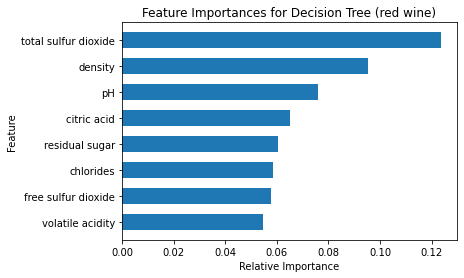

In [ ]:
# https://github.com/CodeAcademyBerlin/Data-Science/blob/master/Module%201/Week%204/Task4.md
# feature selection by data type : https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

r_wq_dt_feature_importances = DT.feature_importances_
w_feature_names, r_wq_dt_feature_scores = zip(*sorted(zip(w_feature_names,r_wq_dt_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(w_feature_names)))
plt.barh(y_position, r_wq_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , w_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree (red wine)')

In [ ]:
r_wq_dt_feature_importances

array([0.0545053 , 0.12364733, 0.05840423, 0.06042798, 0.07601216,
       0.05785194, 0.09534368, 0.06506272, 0.08330624, 0.11240514,
       0.21303327])

In [ ]:
r_feature_imp = pd.Series(r_wq_dt_feature_importances,index=w_feature_names).sort_values(ascending=False)
r_feature_imp

ValueError: ignored

In [ ]:

# classification feature selection
# source: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset

# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape) #(1599, 2)


(1599, 2)


In [ ]:
# another feature selection ======not working

# source: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# get independent and dependent variables 
w_features = wines_red.iloc[:,:-4]
w_feature_names = w_features.columns

X = w_features
Y = wines_red[['quality']]

# to get intercept -- this is optional
# X = sm.add_constant(X)

# define feature selection
fs = SelectKBest(score_func=f_regression, k=5)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

# =========

# scattor plot - comparison of predicted price vs. actual price

In [ ]:
# actual price - white wine 

raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/wines_sales_prep.csv', sep=",", index_col=[0])
raw_data.drop(raw_data.columns[raw_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df_sales = raw_data

df_sales.head(5)

,country,designation,points,price,province,variety,winery,rating,price_bin,rating_n,price_bin_n,wine_type
1,Portugal,Campelo,85,10,Vinho Verde,Portuguese White,Caves Campelo,medium,medium,2,2,white
2,Portugal,Miranda,85,9,Vinho Verde,Portuguese White,Caves Campelo,medium,medium,2,2,white
3,Portugal,Daphne,91,9,Vinho Verde,Loureiro,Casal Paço Padreiro,high,medium,0,2,white
5,Portugal,Casal da Seara,84,10,Vinho Verde,Portuguese White,Caves Campelo,medium,medium,2,2,white
6,Portugal,Torre de Vila Nova,88,12,Vinho Verde,Portuguese White,Casa de Vila Nova,high,medium,0,2,white


In [ ]:
df_sales['wine_type'].isnull().value_counts()

False    315
Name: wine_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


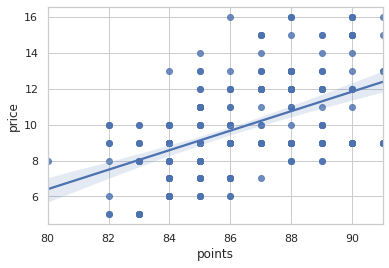

In [ ]:

#create scatterplot with regression line
x = df_sales['points']
y = df_sales['price']
sns.regplot(x, y)

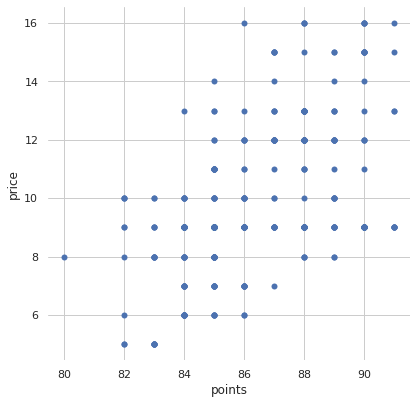

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
price_bin = ["high", "medium", "low"]
sns.scatterplot(x="points", y="price",
                #hue="wine_type", #size="rating_n",
                #palette=SlateGrey, #"ch:r=-.2,d=.3_r",
                hue_order="price_bin",
                linewidth=0,
                data=df_sales, ax=ax)

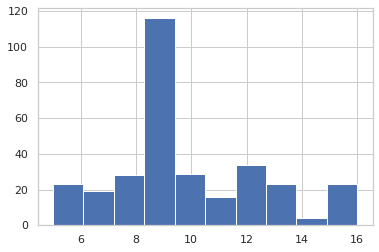

In [ ]:
df_sales['price'].hist()

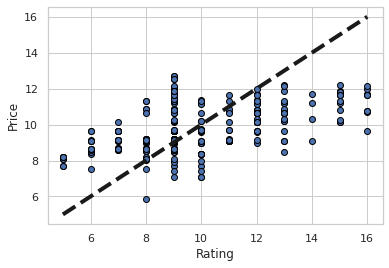

In [ ]:
# coefficient of linear model: from points to price (from cross validated)
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
X = df_sales['points']
y = df_sales['price']
#X, y = datasets.load_diabetes(return_X_y=True)

# standardization
#scaler = MinMaxScaler()
sc = StandardScaler()
X = np.array(X)
X_scaled = sc.fit_transform(X.reshape(-1,1))

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X_scaled, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Rating')
ax.set_ylabel('Price')
plt.show()

## sales data - mean, min, max

In [ ]:
df_sales_white = df_sales[df_sales['wine_type'] == 'white']
df_sales_white

df_sales_w_price_mean = pd.DataFrame(df_sales_white.groupby('price_bin')['price'].mean())
print('price_mean_white')
print(df_sales_w_price_mean)
df_sales_w_price_min = df_sales_white.groupby('price_bin')['price'].min()
df_sales_w_price_max = df_sales_white.groupby('price_bin')['price'].max()
print('min_white')
print(df_sales_w_price_min)
print('max_white')
print(df_sales_w_price_max)

In [ ]:
df_sales_red = df_sales[df_sales['wine_type'] == 'red']
df_sales_red

df_sales_w_price_mean = pd.DataFrame(df_sales_red.groupby('price_bin')['price'].mean())
print('price_mean_red')
print(df_sales_w_price_mean)
df_sales_w_price_min = df_sales_red.groupby('price_bin')['price'].min()
df_sales_w_price_max = df_sales_red.groupby('price_bin')['price'].max()
print('min_red')
print(df_sales_w_price_min)
print('max_red')
print(df_sales_w_price_max)

price_mean_red
           price
price_bin       
low          5.0
medium       9.5
min_red
price_bin
low       5
medium    9
Name: price, dtype: int64
max_red
price_bin
low        5
medium    10
Name: price, dtype: int64


# predicted price

In [ ]:
# coefficient from linear model predicting price from quality 

reg = LinearRegression().fit(X_scaled, y)
print('coef (price>quality):' + str(reg.coef_)) #array([1.27177039])
print('intercept (price>quality):' +str(reg.intercept_))

coef (price>quality):[1.27177039]
intercept (price>quality):9.885714285714288


In [ ]:
# predicted price - white wine - random forest
# predicted price - red wine - random forest

raw_white = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/wines_white.csv', sep=",", index_col=[0])
raw_white.drop(raw_white.columns[raw_white.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df_white_price = raw_white
df_white_price.head(5)

df_white_price['price_est'] = df_white_price['wine_quality_N']
df_white_price['price_est']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label,wine_quality_N
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high,0
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium,2
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium,2
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium,2
6,7.5,0.27,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5,white,low,1


In [ ]:

# if you give us composition of wine, machine  will predict the quality of wine, and we suggest you to rate the wine using this range of price. This criteria is suggested from another dataset. 

# source: https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/




# =================

# Modelling - comparison algorithms for wine_price_tag

In [ ]:
# wpr_train_X, wpr_test_X, wpr_train_y, wpr_test_y

# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# load dataset
# set IV and DV
X = df_feature
Y = df_price

# prepare configuration for cross validation test harness
seed = 10
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 20)))
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

In [ ]:
# evaluate each model in turn - wine_quality
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
 
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# output
# LR: 0.619521 (0.022164)
# KNN: 0.587043 (0.018804)
# RF: 0.814684 (0.011133)
# CART: 0.729568 (0.019463)
# SVM: 0.602586 (0.022230)

In [ ]:
#from sklearn.metrics import cohen_kappa_score
#cohen_kappa_score(labels_of_testing_set, predictions)


# Modelling : predicting price from quality, using RF/LR/KNN/SVM

# sales data exploration

In [ ]:
# load filtered dataset
raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/wine_sales_data.csv", sep=",", index_col = [0])

# re-shuffle records just to randomize data points
df_sales_all = raw.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df_sales_target = df_sales_all[['country', 'description', 'points', 'price', 'variety']]

In [ ]:
df_sales_target.describe() 
#df_sales_all.info #[150930 rows x 11 columns]

In [ ]:
df_sales_target['country'] 

0         Argentina
1           Germany
2                US
3             Chile
4                US
            ...    
150925           US
150926       France
150927           US
150928      Germany
150929       France
Name: country, Length: 150930, dtype: object

In [ ]:
df_sales_target['country'].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [ ]:
sales_country = pd.DataFrame(df_sales_target['country'].value_counts())
sales_country = sales_country.head(14)
sales_country

,country
US,62397
Italy,23478
France,21098
Spain,8268
Chile,5816
Argentina,5631
Portugal,5322
Australia,4957
New Zealand,3320
Austria,3057


In [ ]:
target_country = list(df_sales_target['country'].value_counts().index[0:14])
target_country

['US',
 'Italy',
 'France',
 'Spain',
 'Chile',
 'Argentina',
 'Portugal',
 'Australia',
 'New Zealand',
 'Austria',
 'Germany',
 'South Africa',
 'Greece',
 'Israel']

In [ ]:
pip install squarify

In [ ]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)

In [ ]:
sales_country.country.values

array([62397, 23478, 21098,  8268,  5816,  5631,  5322,  4957,  3320,
        3057,  2452,  2258,   884,   630])

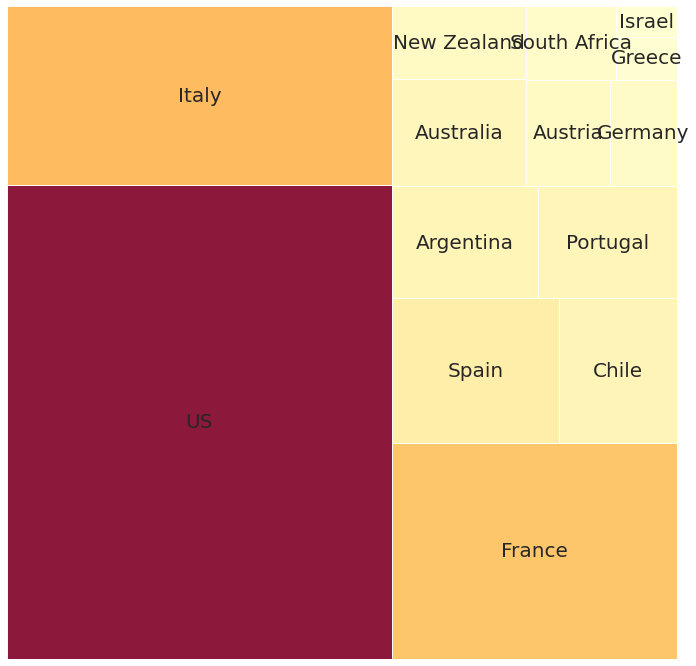

In [ ]:
# If you have a data frame?
import matplotlib
import pandas as pd
#df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })

fig, ax = plt.subplots(1, figsize = (12,12))
norm = matplotlib.colors.Normalize(vmin=min(sales_country.country), vmax=max(sales_country.country))
colors = [matplotlib.cm.YlOrRd(norm(value)) for value in sales_country.country.values]

squarify.plot(sizes=sales_country['country'], label=sales_country['country'].index, color = colors, alpha=.9, text_kwargs={'fontsize':20} )
plt.axis('off')
plt.show()

In [ ]:
df_sales_target.loc[(df_sales_target['country'] == 'US')].value_counts()

,country,description,points,price,variety
2,US,Pure Syrah from a great lineup of vineyards. I...,93,42.0,Syrah
4,US,"The is dry and well balanced, with red licoric...",88,35.0,Pinot Noir
5,US,"Grassy lime, kiwi and crème brûlée provide suc...",91,23.0,Sauvignon Blanc
6,US,My experience of Swan Pinots is that they've b...,90,45.0,Pinot Noir
8,US,Winemaker Nick Elliott taps into the biodynami...,92,55.0,Syrah
...,...,...,...,...,...
150912,US,"This Syrah is so good, it makes you wonder if ...",92,38.0,Syrah
150918,US,"Released at seven years of age, this Syrah is ...",91,36.0,Syrah
150921,US,There's lots of sweetness in this polished win...,86,25.0,Riesling
150925,US,"Tart and zingy in acidity, and a little one-di...",87,25.0,Pinot Noir


In [ ]:
# Creating a bar plot
sns.barplot(x=target_country, y=df_sales_target['price'])
# Add labels to your graph
plt.xlabel('Country')
plt.ylabel('Price')
plt.title("Price of wines in multiple countries")
plt.legend()
plt.show()

KeyError: ignored